**인공지능** : 사람처럼 학습하고 추론할 수 있는 지능을 가진 컴퓨터 시스템을 만드는 기술  
**머신러닝** : 자동으로 데이터에서 규칙을 학습하는 알고리즘  
**딥러닝** : 인공 신경망을 기반으로 한 방법들을 통칭  

데이터 준비 -> 데이터 전처리 -> 모델 생성 -> 학습+파라미터 조정 -> 평가  

**지도 학습** : 문제 + 정답  
**비지도 학습** : 문제만 제공  

학습을 위해서는 train, test 데이터 셋으로 나눠야함 (검증 데이터셋을 사용하기도 함)  
sklearn에 train_test_split을 사용함 -> 샘플링 편향이 일어나지 않도록 주의해야함!  

**샘플링 편향** : 훈련과 테스트 세트에 샘플이 골고루 섞여 있지 않아 샘플링이 한쪽으로 치우쳤음  

**데이터 전처리**  
1) 결측값, 이상치 처리 -> null, 평균, 0으로 값을 교체하거나 샘플을 삭제  
2) train, test 데이터 셋 분리 -> 샘플링 편향이 일어나지 않도록 주의!
3) 사용하는 모델에 따라 표준점수로 스케일을 맞춰주는 스케일링이 필요할 수 있음

**표준점수** : 평균을 빼고 표준 편차로 나눠주기  

In [14]:
##표준 점수 구하는 예시
import numpy as np
import random

ex = []
for _ in range(20):
    ex.append(random.randint(1,100))

print("변환 전:",ex)

mean = np.mean(ex)
std = np.std(ex)
print("평균:",mean,"표준편차",std)

ex_scaled = (ex-mean) / std
print("변환 후:",ex_scaled)

#예시는 1차원 리스트로 했지만 표준편차로 스케일링은 x,y차원을 맞추려고 하는 것임

변환 전: [92, 46, 60, 67, 46, 1, 49, 57, 31, 19, 30, 16, 82, 55, 34, 12, 41, 44, 81, 17]
평균: 44.0 표준편차 24.197107265125723
변환 후: [ 1.9837082   0.08265451  0.66123607  0.95052684  0.08265451 -1.77707193
  0.20663627  0.5372543  -0.5372543  -1.03318135 -0.57858156 -1.15716311
  1.57043566  0.45459979 -0.41327254 -1.32247213 -0.12398176  0.
  1.5291084  -1.11583586]


## **03-1 k-최근접 이웃**

k-최근접 이웃 회귀  
예측하려는 샘플에서 가장 가까운 샘플 k개를 선택하여 새로운 샘플의 클래스 예측  

In [16]:
##데이터 준비
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

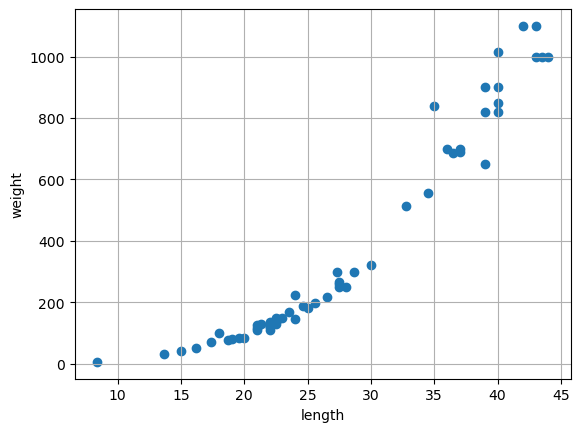

In [18]:
##데이터 시각화
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.grid()
plt.show()

In [20]:
##데이터셋 분할
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(42,) (14,)
(42,) (14,)


In [41]:
##크기 맞춰주기
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [26]:
##모델 훈련
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

print(knr.score(test_input, test_target))

0.992809406101064


In [34]:
##mae, mse

#1.mean_absolute_error 평균 절댓값 오차
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

#2.mean_squard_error 평균 제곱 오차
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_target, test_prediction)
print(mse)

##예측값과 정답값을 비교하려면 그 차이를 구해햐하는데 (예측-정답)을 그냥 더해 평균을 내면 값이 상쇄되어 정확한 값을 알 수 없음
##해결 방법은 1. 차이에 절댓값을 씌우는 mae, 2. 차이를 제곱하는 mse가 있음

19.157142857142862
721.7385714285714


In [42]:
#과대적합 과소적합 확인하기
print("학습 :",knr.score(train_input, train_target))
print("테스트 :", knr.score(test_input, test_target))

학습 : 0.9698823289099254
테스트 : 0.992809406101064


과소 적합이 발생했음을 알 수 있음  
과대적합: 학습 >>>> 테스트   
과소적합: 테스트 > 학습, 테스트랑 학습 모두 점수가 낮은 경우  

과대적합은 모델이 너무 복합한 경우에 발생 -> 모델을 간단하게 만들기, 데이터 셋을 늘리기  
과소적합은 모델이 너무 단순한 경우에 발생 -> 모델을 복잡하게 만들기  

In [46]:
##모델 수정
train_score = []
test_score = []

for i in range(2,30):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(train_input, train_target)

    train_score.append(knr.score(train_input, train_target))
    test_score.append(knr.score(test_input, test_target))


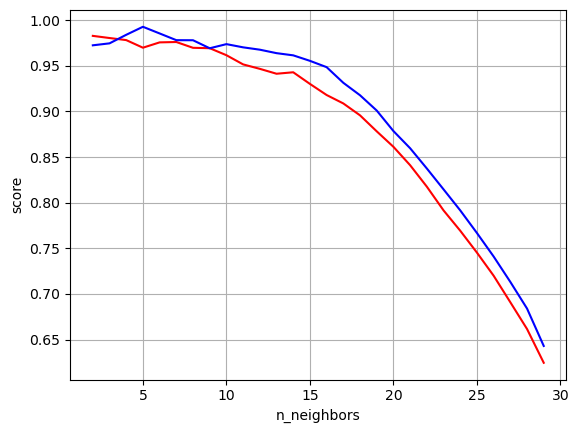

In [62]:
plt.figure()
plt.plot(np.arange(2,30), train_score, c='r')
plt.plot(np.arange(2,30), test_score, c='b')
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.grid()
plt.show()

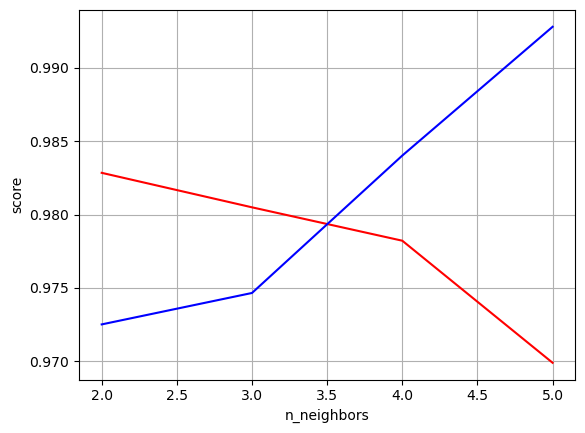

In [68]:
#확대
plt.figure()
plt.plot(np.arange(2,6), train_score[:4], c='r')
plt.plot(np.arange(2,6), test_score[:4], c='b')
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.grid()
plt.show()

이런 경우에 neighbors 값을 얼마로 해야하는지 궁금합니다.(학습 점수를 높게? 훈련 점수를 높게?)

 KNeighborsRegressor 하이퍼파라미터 종류   
 1) n_neighbors -> 몇개의 이웃을 선택할 것인지  
    KNeighborsRegressor(n_neighbors=3)    
 2) weights -> 가중치 / uniform = 동일 가중치 (기본값) , distance = 가까울수록 가중치 증가    
    KNeighborsRegressor(weights="distance")  
 3) metric -> "euclidean" 유클리디안 거리/"manhattan" 맨해튼 거리/ "minkowski" p값에 따라 달라짐
    KNeighborsRegressor(metric="manhattan")
 4) p -> Minkowski 거리에서 사용하는 지수/ p=1 → Manhattan, p=2 → Euclidean (기본값)  
    KNeighborsRegressor(p=1)

## **03-2 선형 회귀**

In [43]:
##KNEighbors의 한계 -> 새로운 샘플이 훈련 셋의 범위에서 벗어나면 엉뚱한 값을 예측할 수 있음
## => 다른 회귀 기법인 선형 회귀 사용!
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [47]:
#선형 회귀 모델을 기울기와 가중치 구하기
print(lr.coef_, lr.intercept_)

# y = 39x - 709

[39.01714496] -709.0186449535477


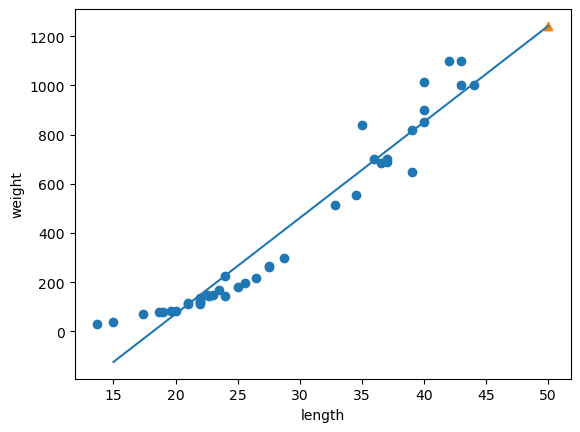

In [51]:
#시각화
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_ ])
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [53]:
#평가
print("훈련:",lr.score(train_input, train_target))
print("테스트:",lr.score(test_input, test_target))

훈련: 0.939846333997604
테스트: 0.8247503123313558


선형 회귀로는 한계가 있음...! 곡선 부분을 잘 예측하지 못함

In [62]:
##다항 회귀 -> 항이 여러개 like 이차함수
## 특성을 제곱
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [60]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2,50]]))

[1573.98423528]


In [66]:
print(lr.coef_, lr.intercept_)

# y = 1.01*x^2 -21.6*x + 116.05

[  1.01433211 -21.55792498] 116.05021078278259


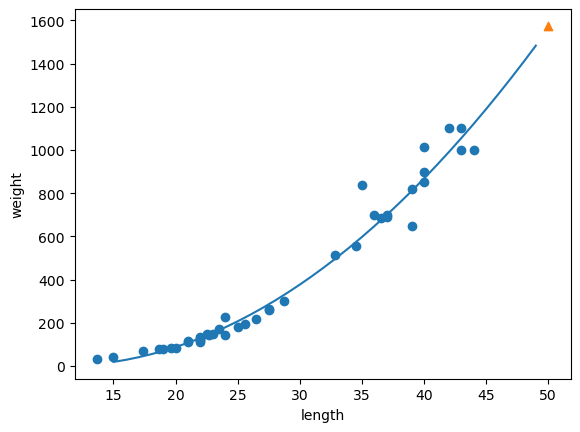

In [68]:
#시각화
point = np.arange(15,50)

plt.figure()
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
plt.scatter(50,1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [70]:
#평가 
print("훈련:",lr.score(train_poly, train_target))
print("테스트:",lr.score(test_poly, test_target))

훈련: 0.9706807451768623
테스트: 0.9775935108325121


아직 과소적합이 있음 -> 더 복잡한 모델이 필요!